In [7]:
import Pkg
Pkg.activate("BosonStars")
using Parameters
using CairoMakie
using Printf
using Colors
using DelimitedFiles
using Revise
using Skylight
include("src/BosonStars.jl")

  Activating project at `/serafin/jpelle/BosonStars/BosonStars`


In [9]:
create_model_set(LBS_ids = 1:3)

3-element Vector{Any}:
 BosonStar{LBS, 1}(LBS())
 BosonStar{LBS, 2}(LBS())
 BosonStar{LBS, 3}(LBS())

In [8]:
LBSmodels = create_model_set(LBS_ids = 1:3) 
SBSmodels = create_model_set(SBS_ids = 1:3) 
BHmodel = create_model_set(BH = true)

LBSrunset = RunSet(models = LBSmodels,
                    inclinations = [5, 45, 85],
                    number_of_pixels_per_side = 1200,
                    observation_radius = 1000.0)

SBSrunset = RunSet(models = SBSmodels,
                    inclinations = [5, 45, 85],
                    number_of_pixels_per_side = 1200,
                    observation_radius = 1000.0)

BHrunset = RunSet(models = BHmodel,
                    inclinations = [5, 45, 85],
                    number_of_pixels_per_side = 1200,
                    observation_radius = 1000.0)

_, zmax = zextrema([LBSrunset, SBSrunset, BHrunset])

bolometric_intensity_mosaic(LBSrunset; zmax = zmax, figname = "plots/LBS_mosaic.pdf")
bolometric_intensity_mosaic(SBSrunset; zmax = zmax, figname = "plots/SBS_mosaic.pdf")
bolometric_intensity_mosaic(BHrunset; zmax = zmax, figname = "plots/BH_mosaic.pdf")

ε = eV_to_erg(1.0)
observation_energies = ε*exp10.(range(0.0, stop=4.0, length=20))
spectrum_mosaic(LBSrunset, SBSrunset, BHrunset; observation_energies = observation_energies, figname = "plots/spectrum_mosaic.pdf")

MethodError: MethodError: no method matching RunSet(::Vector{Any}, ::Vector{Int64}, ::Int64, ::Float64)

Closest candidates are:
  RunSet(!Matched::Vector{M}, ::Vector{T}, ::Any, ::Any) where {M<:AbstractModel, T<:Real}
   @ Main ~/.julia/packages/Parameters/MK0O4/src/Parameters.jl:525


In [ ]:

bolometric_intensity_mosaic(LBSrunset; zmax = zmax, figname = "plots/LBS_mosaic.pdf")
bolometric_intensity_mosaic(SBSrunset; zmax = zmax, figname = "plots/SBS_mosaic.pdf")
bolometric_intensity_mosaic(BHrunset; zmax = zmax, figname = "plots/BH_mosaic.pdf")

ε = eV_to_erg(1.0)
observation_energies = ε*exp10.(range(0.0, stop=4.0, length=20))
spectrum_mosaic(LBSrunset, SBSrunset, BHrunset; observation_energies = observation_energies, figname = "plots/spectrum_mosaic.pdf")

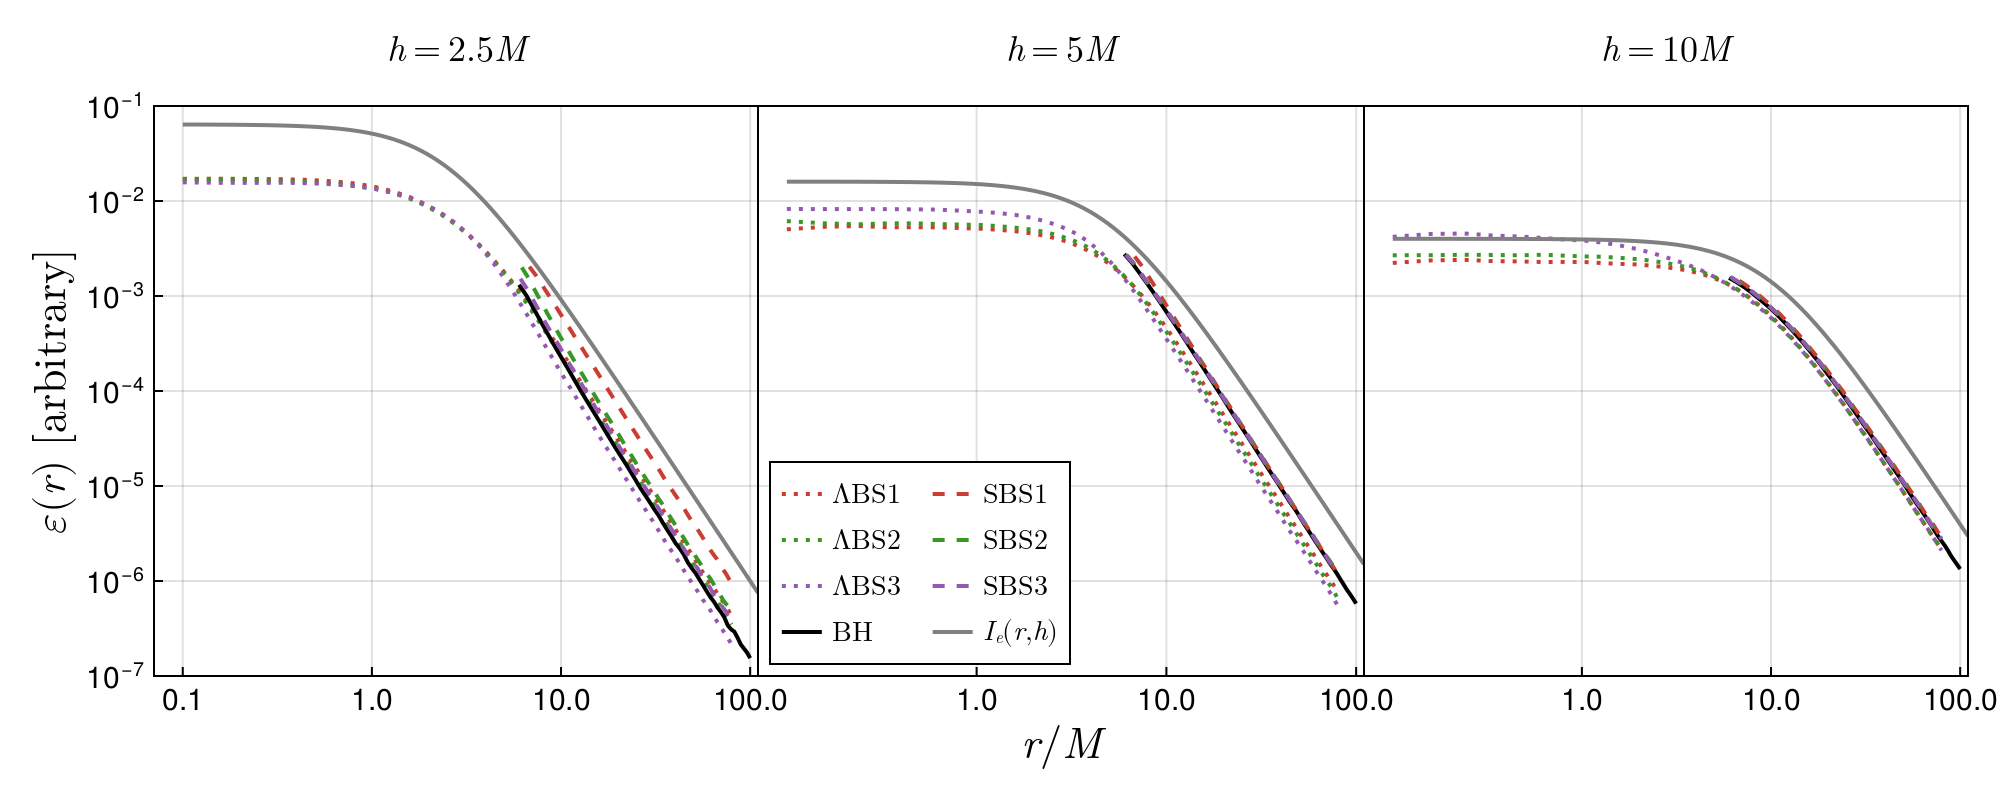

CairoMakie.Screen{PDF}


In [53]:
LBScorona_runset = CoronaRunSet(models = LBSmodels,
                    heights = [2.5, 5.0, 10.0],
                    spectral_index = 2.0,
                    npp = 5000000,
                    num_radial_bins = 50)

SBScorona_runset = CoronaRunSet(models = SBSmodels,
                    heights = [2.5, 5.0, 10.0],
                    spectral_index = 2.0,
                    npp = 5000000,
                    num_radial_bins = 50)

BHcorona_runset = CoronaRunSet(models = BHmodel,
                    heights = [2.5, 5.0, 10.0],
                    spectral_index = 2.0,
                    npp = 5000000,
                    num_radial_bins = 50)

emissiviy_profile_mosaic(LBScorona_runset, SBScorona_runset, BHcorona_runset; figname = "plots/emissivity_mosaic.pdf")
emissiviy_profile_mosaic_focused(SBScorona_runset, BHcorona_runset; figname = "plots/emissivity_mosaic_focused.pdf")
line_emission_mosaic(SBSrunset, BHrunset, SBScorona_runset, BHcorona_runset; num_energy_bins = 40, figname = "plots/line_emission_mosaic.pdf")